# 仮説集合の複雑度

## VC次元

**VC次元 (VC dimension)** は仮説集合の複雑度の指標の一つ。
主に2値判別問題の仮説集合に用いられるが、多値判別問題や回帰問題に拡張することも可能。
名前の由来は理論の創始者であるVapnikとChervonenkisから。

2値判別のための仮説集合を $\mathcal{H}$ とする。
仮説 $h \in \mathcal{H}$ は、入力空間 $\mathcal{X}$ から $|\mathcal{Y}|=2$ であるようなラベル集合 $\mathcal{Y}$ への関数とする。
入力の集合 $\{x_1, \ldots, x_n\} \subset \mathcal{X}$ に対して、$\mathcal{Y}^n$ の部分集合

$$
\{(h(x_1), \ldots, h(x_n)) \in \mathcal{Y}^n \mid h \in \mathcal{H}\}
$$


の要素数を

$$
\Pi_{\mathcal{H}}(x_1, \ldots, x_n) = |\{(h(x_1), \ldots, h(x_n)) \in \mathcal{Y}^n \mid h \in \mathcal{H}\}|
$$

とおく（英語だとGrowth Functionと呼ばれる様子）。

定義より

$$
\Pi_{\mathcal{H}}(x_1, \ldots, x_n) \leq 2^n
$$

である。

:::{margin}

有限集合$A_i$の直積集合$\Pi_i^n A_i = A_1\times \cdots \times A_n$の要素数は、個々の集合の要素数の積$|A_1| \times \cdots \times |A_n|$になるため、$|\mathcal{Y}|=2$より最大で$\Pi_{\mathcal{H}}(x_1, \ldots, x_n) = 2^n$になる。
:::

入力の数$n$が増えていけばラベル付のパターンが豊富となり、等式$\Pi_{\mathcal{H}}(x_1, \ldots, x_n) = 2^n$が成立しにくくなると考えられる。その境界となるデータ数$n$を$\mathcal{H}$のVC次元と呼ぶ。

数式的には、$\mathcal{H}$のVC次元$\operatorname{VCdim}(\mathcal{H})$は

$$
\operatorname{VCdim}(\mathcal{H})
:= \max \left\{
n \in \mathbb{N} \left| ~ \max _{x_1, \ldots, x_n \in \mathcal{X}} \Pi_{\mathcal{H}}(x_1, \ldots, x_n) = 2^n \right.
\right\}
$$

と定義される。また、任意の $n \in \mathbb{N}$ に対して $x_1, \ldots, x_n \in \mathcal{X}$ が存在して $\Pi_{\mathcal{H}}\left(x_1, \ldots, x_n\right)=2^n$ が成り立つときは $\operatorname{VCdim}(\mathcal{H})=\infty$ と定義する。

VC次元は言葉で説明すると「仮説集合$\mathcal{H}$のもとで、ラベルのすべての組み合わせを網羅できる（どんなラベル付けにも対応可能な仮説が存在する）データ数の最大値」となる。

### 例：step function

1直線上に並ぶ点で、step functionのようにラベルが変化する（positive raysと呼ばれる？）なら、1つの点で分離できる。

$\mathcal{H}$ が $h: \mathbb{R} \to \{0, 1\}$なる関数、具体的には $h(x) = \mathbb{1}(x \geq a)$ をすべて含むとする。

$n$個のデータ点を2つの領域に分類するとき、$n+1$個のパターンがある。

Growth functionは$\Pi_{\mathcal{H}}(x_1, \ldots, x_n) = n + 1$となり、$n=0,1$のときのみ$\Pi_{\mathcal{H}}(x_1, \ldots, x_n) = 2^n$なので、$\operatorname{VCdim}(\mathcal{H})=1$となる。


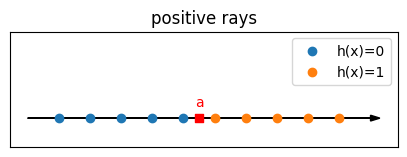

In [75]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[5, 1.5])

x = np.arange(0, 10)
a = 4.5
y = 1 * (x >= a)
ax.arrow(-1, 0, x.max() + 2, 0, head_width=0.1, head_length=0.3, fc='black', ec='black')
for y_ in [0, 1]:
    idx = y_ == y
    ax.scatter(x[idx], np.zeros_like(x[idx]), label=f"h(x)={y_}")

ax.scatter(a, 0, marker="s", color="red")
ax.text(a, 0.2, "a", color="red", ha="center")

ax.legend()
ax.set(ylim=(-0.5, 1.5), yticks=[], yticklabels=[], xticks=[], xticklabels=[], title="positive rays")
fig.show()

### 例：intervals

1直線上で、ある区間だけ$y=1$、他が$y=0$となる場合。

Growth functionは

$$
\Pi_{\mathcal{H}}(x_1, \ldots, x_n) = \binom{n+1}{2}+1=\frac{1}{2} n^2+\frac{1}{2} n+1
$$

となり、$n=0,1,2$のときのみ$\Pi_{\mathcal{H}}(x_1, \ldots, x_n) = 2^n$なので、$\operatorname{VCdim}(\mathcal{H})=2$となる。

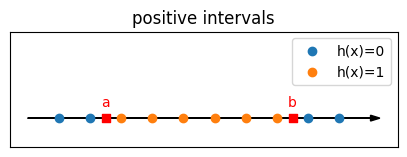

In [76]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[5, 1.5])
x = np.arange(0, 10)
a, b = [1.5, 7.5]
y = 1 * (a <= x) * (x < b)
ax.arrow(-1, 0, x.max() + 2, 0, head_width=0.1, head_length=0.3, fc='black', ec='black')
for y_ in [0, 1]:
    idx = y_ == y
    ax.scatter(x[idx], np.zeros_like(x[idx]), label=f"h(x)={y_}")

ax.scatter(a, 0, marker="s", color="red")
ax.text(a, 0.2, "a", color="red", ha="center")
ax.scatter(b, 0, marker="s", color="red")
ax.text(b, 0.2, "b", color="red", ha="center")

ax.legend()
ax.set(ylim=(-0.5, 1.5), yticks=[], yticklabels=[], xticks=[], xticklabels=[], title="positive intervals")

fig.show()

### 例：3点

一直線上にない3点までなら、1つの直線でグループを2つに分けられる。4点になると分けられないものが出てくる（線形分離不可能問題）

[VC次元の意味と例 - 具体例で学ぶ数学](https://mathwords.net/vcjigen#google_vignette)

### サウアーの補題

$\mathcal{H}$のVC次元を$d$とおくと、$d\leq n$なら$\Pi_{\mathcal{H}}(x_1, \ldots, x_n)$は高々$d$次の多項式オーダー$O(n^d)$となる。

:::{admonition} サウアーの補題（Sauer's lemma）

2 値ラベルに値をとる仮説集合 $\mathcal{H}$ の VC 次元が $d$ のとき、 $n \geq d$ に対して

$$
\max _{x_1, \ldots, x_n \in \mathcal{X}} \Pi_{\mathcal{H}}\left(x_1, \ldots, x_n\right) \leq\left(\frac{e n}{d}\right)^d
$$

が成り立つ。 ここで $e$ はネイピア数 $(2.718 \cdots)$である。
:::



### VC次元と予測誤差の関係

:::{admonition} 定理

2 値ラベルに値をとる仮説集合 $\mathcal{H} \subset\{h: \mathcal{X} \rightarrow\{+1,-1\}\}$ の VC次元を $d<\infty$ とする。
学習データ $\left(X_1, Y_1\right), \ldots,\left(X_n, Y_n\right)$ は独立に同一の分布に従うとする。損失として $0-1$ 損失を用いると、$n \geq d$ のとき、学習データの分布のもとで $1-\delta$ 以上の確率で

$$
\sup_{h \in \mathcal{H}}\left|R(h)-\hat{R}(h)\right|
\leq 2 \sqrt{\frac{2 d}{n} \log \frac{e n}{d}}+\sqrt{\frac{\log (2 / \delta)}{2 n}}
$$

が成り立つ。
:::

この定理の証明にはラデマッハ複雑度による一様大数の法則が用いられる。




学習データ$S=\{(X_1, Y_1), \ldots,(X_n, Y_n)\}$が観測されたとき、経験判別誤差$\hat{R}(h)$の最小化で得られる仮説を$h_S$とする。簡単のため、ベイズ規則$h_0$が$\mathcal{H}$に含まれるとする。このとき

$$
\hat{R}(h_S) \leq \hat{R}(h_0)\\
R(h_0) \leq R(h_S)
$$

が常に成り立つ。そして以下が成り立つ

（以下は金森（2015）のp.22の式展開を想像で補ったりしたもの）

$$
\begin{aligned}
&\hat{R}(h_S) \leq \hat{R}(h_0) \\
&\iff \hat{R}(h_S) + \underbrace{ R(h_S) }_{追加} \leq \hat{R}(h_0) + \underbrace{ R(h_S) }_{追加} \\
&\iff R(h_S) \leq \hat{R}(h_0) + R(h_S) - \hat{R}(h_S) \\
&\iff R(h_S) \leq \underbrace{ R(h_0) - R(h_0) }_{追加} + \hat{R}(h_0) + R(h_S) - \hat{R}(h_S) \\
&\iff R(h_S) \leq R(h_0) + |\hat{R}(h_0) - R(h_0)| + \sup_{h\in\mathcal{H}} |R(h_S) - \hat{R}(h_S)|
    \quad (おそらく、supなら上限のため不等号で大きい方に置いても妥当なため）\\
&\iff R(h_S) \leq R(h_0) + 2 \sup_{h\in\mathcal{H}} |R(h_S) - \hat{R}(h_S)|
    \quad (おそらく h_0\in\mathcal{H}の仮定のため) \\
&\iff R(h_S) \leq R(h_0) + 4 \sqrt{\frac{2 d}{n} \log \frac{e n}{d}}+\sqrt{\frac{\log (2 / \delta)}{2 n}} \quad (前述の定理のため)\\
\end{aligned}
$$

確率オーダーで表現すると

$$
R(h_S) \leq R(h_0) + O_p \left(\sqrt{\frac{\log(n/d)}{n/d}} \right)
$$

となり、予測誤差はデータ数とVC次元の比$n/d$と関連していることがわかる。

### PAC学習との関係

VC次元は、PAC学習の理論を仮説集合が有限でない場合にも拡張する際に登場する指標らしい（[VC次元の意味と例 - 具体例で学ぶ数学](https://mathwords.net/vcjigen)）

## 参考

- https://www.mathematik.uni-muenchen.de/~deckert/teaching/SS17/ATML/media/VC_dimension.pdf
- [統計的学習理論読み Chapter 2 - Speaker Deck](https://speakerdeck.com/kmatsui/tong-ji-de-xue-xi-li-lun-du-mi-chapter-2?slide=10)